<a href="https://colab.research.google.com/github/DJCordhose/ml-resources/blob/master/notebooks/image/intro_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Quest for Generalization

https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

figsize_3d = (12, 12)

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

2022-07-09 18:34:54.703254: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-09 18:34:54.706450: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-09 18:34:54.706459: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.9.1'

In [4]:
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


In [5]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [6]:
tf.config.list_physical_devices('GPU')

2022-07-09 18:34:56.465400: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-09 18:34:56.465447: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-09 18:34:56.465462: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-BEN73DP): /proc/driver/nvidia/version does not exist


[]

In [7]:
# if we do not want GPU
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [8]:
from tensorflow.keras.preprocessing import image

import numpy as np

def predict(model, img_path):
#     img = image.load_img(img_path, target_size=(224, 224))
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])
#     print(preds)

In [9]:
# https://keras.io/api/applications/
# from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
# mobilnetv2_model = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))

# from tensorflow.keras.applications.resnet import ResNet50
# from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
# resenet50_model = ResNet50(weights='imagenet', input_shape=(224, 224, 3))

# https://keras.io/api/applications/resnet/#resnet50v2-function
# https://arxiv.org/abs/1603.05027
# ... makes training easier and improves generalization
# from tensorflow.keras.applications.resnet_v2 import ResNet50V2
# from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
# resenet50V2_model = ResNet50V2(weights='imagenet', input_shape=(224, 224, 3))

# https://keras.io/api/applications/xception/
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
xception_model = Xception(weights='imagenet', input_shape=(299, 299, 3))

# model = resenet50_model
# model = resenet50V2_model
model = xception_model

# model.summary()
# len(model.layers)

2022-07-09 18:34:56.505314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
!ls ../../data/squirrels

2022						       berkeley4.jpg
Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg  boston-vrx.JPG
Michigan-MSU-raschka.jpg			       comic.jpg
austin1.jpg					       emoji.png
austin2.jpg					       london.jpg
austin3.jpg					       monster
austin4.jpg					       san_francisco_1.jpg
austin5.jpg					       san_francisco_2.jpg
berkeley1.jpg					       yosemite.jpg
berkeley2.jpg					       yosemite2.jpg
berkeley3.jpg


In [11]:
!ls ../../data/squirrels/2022/squirrel

austin-blurred.jpg  austin-close.jpg	 austin-shadow.jpg  austin-tree.jpg
austin-bum.jpg	    austin-drinking.jpg  austin-socket.jpg


In [12]:
# img_path = '../../data/squirrels/austin1.jpg'
# img_path = '../../data/squirrels/yosemite.jpg'
# img_path = '../../data/squirrels/comic.jpg'
# img_path = '../../data/squirrels/emoji.png'


img_path = '../../data/squirrels/Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg'
img_path = '../../data/squirrels/london.jpg'

img_path = '../../data/squirrels/2022/squirrel/austin-close.jpg'
img_path = '../../data/squirrels/2022/squirrel/austin-blurred.jpg'
img_path = '../../data/squirrels/2022/squirrel/austin-drinking.jpg' 
img_path = '../../data/squirrels/2022/squirrel/austin-bum.jpg'
# img_path = '../../data/squirrels/2022/squirrel/austin-shadow.jpg'


In [13]:
from IPython.display import Markdown as md
md(f"<img src={img_path}>")

<img src=../../data/squirrels/2022/squirrel/austin-bum.jpg>

In [14]:
cat_img_path = 'cat-bonkers.png'

from IPython.display import Markdown as md
md(f"<img src={cat_img_path}>")

<img src=cat-bonkers.png>

In [15]:
predict(model = model, img_path = cat_img_path)

1/1 [==============================] - 1s 802ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.9397457), ('n02123159', 'tiger_cat', 0.019086512), ('n02123045', 'tabby', 0.010862169)]


# Re-Training with Austin Squirrels

In [16]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 127ms/step
Predicted: [('n02356798', 'fox_squirrel', 0.9699071), ('n02326432', 'hare', 0.003918362), ('n02325366', 'wood_rabbit', 0.001425633)]


In [17]:
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

1/1 [==============================] - 0s 139ms/step


In [18]:
# https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
# 335 fox squirrel, eastern fox squirrel, Sciurus niger
preds.argmax(), preds.max()

(335, 0.9699071)

In [19]:
decode_predictions(preds, top=3)[0]

[('n02356798', 'fox_squirrel', 0.9699071),
 ('n02326432', 'hare', 0.003918362),
 ('n02325366', 'wood_rabbit', 0.001425633)]

In [20]:
# tf.keras.preprocessing.image_dataset_from_directory?

In [21]:
7 * [335]

[335, 335, 335, 335, 335, 335, 335]

In [22]:
x_size = 299
y_size = 299
image_size = (y_size, x_size)
batch_size = 32
seed=1337

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../data/squirrels/2022",
#     validation_split=0.2,
#     subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
#     labels='inferred'
    labels=7 * [335]
    
)

Found 7 files belonging to 1 classes.


In [23]:
image_batch, label_batch = next(iter(train_ds))
image_batch.shape, label_batch.shape

(TensorShape([7, 299, 299, 3]), TensorShape([7]))

In [24]:
image = image_batch[0]
image.shape

TensorShape([299, 299, 3])

In [25]:
import numpy as np

image_np = image.numpy()
image_np.dtype

dtype('float32')

In [26]:
np.min(image_np), np.max(image_np)

(0.0, 255.0)

In [27]:
image_np = image_np / 255.0
np.min(image_np), np.max(image_np)

(0.0, 1.0)

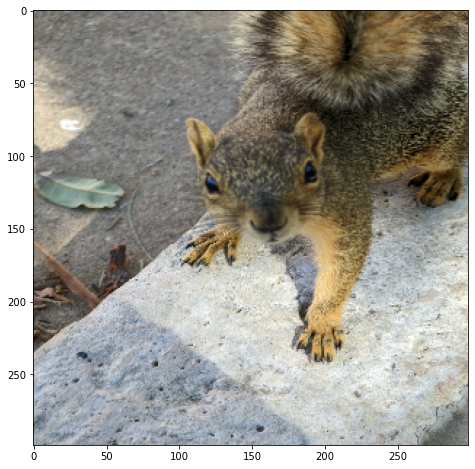

In [28]:
plt.imshow(image_np);

In [29]:
# normalized_train_ds = train_ds.map(lambda image, label: (image / 255.0, label))
normalized_train_ds = train_ds.map(lambda image, label: (preprocess_input(image), label))

In [30]:
image_batch, label_batch = next(iter(normalized_train_ds))
image = image_batch[0]
image_np = image.numpy()
image_np.dtype, np.min(image_np), np.max(image_np)

(dtype('float32'), -1.0, 1.0)

In [31]:
label_batch

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([335, 335, 335, 335, 335, 335, 335], dtype=int32)>

In [32]:
from tensorflow.keras.preprocessing import image

In [33]:
from lrcurve import KerasLearningCurve

In [34]:
%%time

# learning_rate = 0.001
# learning_rate = 0.0001
# epochs = 5
# learning_rate = 0.00005

# to even recognize shadow, probably overfit in that case
# epochs = 50
epochs = 10
learning_rate = 0.00002

# epochs = 50
# learning_rate = 0.00001

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
             metrics=['accuracy'])
history = model.fit(
    normalized_train_ds, 
#     validation_data=normalized_val_ds,
    epochs=epochs,
    callbacks=[KerasLearningCurve()],
    verbose=0)

CPU times: user 1min 28s, sys: 2.06 s, total: 1min 30s
Wall time: 21.1 s


In [57]:
img_path = '../../data/squirrels/2022/squirrel/austin-close.jpg'
# img_path = '../../data/squirrels/2022/squirrel/austin-blurred.jpg'
img_path = '../../data/squirrels/2022/squirrel/austin-drinking.jpg' 
# img_path = '../../data/squirrels/2022/squirrel/austin-bum.jpg'
img_path = '../../data/squirrels/2022/squirrel/austin-shadow.jpg'

# img_path = '../../data/squirrels/Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg'
# img_path = '../../data/squirrels/yosemite.jpg'
# img_path = '../../data/squirrels/comic.jpg'
img_path = '../../data/squirrels/emoji.png'


In [58]:
from IPython.display import Markdown as md
md(f"<img src={img_path}>")

<img src=../../data/squirrels/emoji.png>

In [59]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 129ms/step
Predicted: [('n02356798', 'fox_squirrel', 0.045340814), ('n04023962', 'punching_bag', 0.042812075), ('n03825788', 'nipple', 0.038255494)]


In [60]:
predict(model = model, img_path = cat_img_path)

1/1 [==============================] - 0s 126ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.9539637), ('n02123159', 'tiger_cat', 0.0131202405), ('n02123045', 'tabby', 0.008195268)]


In [61]:
dog_img_path = '440px-Beagle_Upsy.jpg'
predict(model = model, img_path = dog_img_path)

1/1 [==============================] - 0s 131ms/step
Predicted: [('n02101388', 'Brittany_spaniel', 0.6246768), ('n02088364', 'beagle', 0.12675302), ('n02091244', 'Ibizan_hound', 0.029489962)]


In [62]:
beaver_img_path = 'emoji-beaver.png'
md(f"<img src={beaver_img_path}>")

<img src=emoji-beaver.png>

In [63]:
predict(model = model, img_path = beaver_img_path)

1/1 [==============================] - 0s 130ms/step
Predicted: [('n02356798', 'fox_squirrel', 0.14552607), ('n02326432', 'hare', 0.07104529), ('n02342885', 'hamster', 0.019014493)]


In [64]:
skunk_img_path = 'emoji-skunk.png'
md(f"<img src={skunk_img_path}>")

<img src=emoji-skunk.png>

In [65]:
predict(model = model, img_path = skunk_img_path)

1/1 [==============================] - 0s 130ms/step
Predicted: [('n03935335', 'piggy_bank', 0.042116493), ('n03840681', 'ocarina', 0.037744988), ('n03623198', 'knee_pad', 0.028789936)]


In [66]:
img_path = 'emoji-rat.png'
md(f"<img src={img_path}>")

<img src=emoji-rat.png>

In [67]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 121ms/step
Predicted: [('n03825788', 'nipple', 0.22290152), ('n03476684', 'hair_slide', 0.07337397), ('n03720891', 'maraca', 0.03637218)]


In [68]:
img_path = 'emoji-flamingo.png'
md(f"<img src={img_path}>")

<img src=emoji-flamingo.png>

In [69]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 117ms/step
Predicted: [('n02007558', 'flamingo', 0.16787083), ('n12057211', "yellow_lady's_slipper", 0.024868976), ('n03532672', 'hook', 0.014446956)]


In [70]:
img_path = 'emoji-hedgehog.png'
md(f"<img src={img_path}>")

<img src=emoji-hedgehog.png>

In [71]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 114ms/step
Predicted: [('n02442845', 'mink', 0.1493138), ('n02346627', 'porcupine', 0.08120539), ('n02356798', 'fox_squirrel', 0.07843033)]


In [72]:
img_path = 'emoji-swan.png'
md(f"<img src={img_path}>")

<img src=emoji-swan.png>

In [73]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 126ms/step
Predicted: [('n03825788', 'nipple', 0.09103938), ('n01860187', 'black_swan', 0.032710977), ('n03047690', 'clog', 0.02791088)]


In [74]:
img_path = 'emoji-hare.png'
md(f"<img src={img_path}>")

<img src=emoji-hare.png>

In [75]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 125ms/step
Predicted: [('n02326432', 'hare', 0.52887), ('n02325366', 'wood_rabbit', 0.1475545), ('n02328150', 'Angora', 0.055031)]
